In [1]:
import pandas as pd
from Classe_sismogramma_v3 import ClasseDataset
import numpy as np
import _Library_HOS
from _Library_HOS import semblance, log_hist
import scipy.signal as sc_sig
import matplotlib.pyplot as plt

times_hos= pd.read_csv("/home/silvia/Desktop/ONSET_HOS/ONSET_DETECT_whole_checked(std15_tolerance40).csv")
ev_utili = pd.read_csv("/home/silvia/Desktop/Data/DETECT/ID_DETECT_Utilizzabili.txt")
metadata = pd.read_csv("/home/silvia/Desktop/Data/DETECT/Detect_all_metadata_extended.csv")

times_all = times_hos[(times_hos["Accept"]=="TRUE") | (times_hos["trace_P_arrival_sample"]>0)]


evi = []
stat = []

for trace in times_all["trace_name"]:
    a = trace.split(".")
    evi.append(a[0])
    stat.append(a[1])

times_all["event"] = evi
times_all["station"] = stat


drops = []  # select only useful events
for i in times_all.index:
    if int(times_all.loc[i,"event"]) in ev_utili["ID_DETECT"].values:
        3
    else:
        drops.append(i)
times_all_util = times_all.drop(drops,axis="index")

util_hos        = times_all_util[times_all_util["Accept"]=="TRUE"]
util_cat        = times_all_util[times_all_util["trace_P_arrival_sample"]>0]
util_common     = times_all_util[(times_all_util["trace_P_arrival_sample"]>0) & (times_all_util["Accept"]=="TRUE")]
util_only_hos   = times_all_util[(times_all_util["trace_P_arrival_sample"]<0) & (times_all_util["Accept"]=="TRUE")]
util_only_cat   = times_all_util[(times_all_util["trace_P_arrival_sample"]>0) & (times_all_util["Accept"]!="TRUE")]

# k = "stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"
# cat_only_snr = _Library_HOS.SNR2(D.sismogramma[util_only_cat.index],util_only_cat[k].values,equalsize=True)

/tmp/ipykernel_393643/977835747.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  times_all["event"] = evi
/tmp/ipykernel_393643/977835747.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  times_all["station"] = stat


In [2]:
D = ClasseDataset()
hd = "/home/silvia/Desktop/Data/DETECT/Detect_all_data_extended.hdf5"
cs = "/home/silvia/Desktop/Data/DETECT/Detect_all_metadata_extended.csv"
D.leggi_custom_dataset(hd,cs)
D.demean()

In [3]:
D.metadata["trace_snr"] = 0

In [4]:
k = "stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"
hos_snr = _Library_HOS.SNR2(D.sismogramma[util_hos.index],util_hos[k].values)
cat_snr = _Library_HOS.SNR2(D.sismogramma[util_cat.index],util_cat["trace_P_arrival_sample"].values,equalsize=True)
common_cat_snr = _Library_HOS.SNR2(D.sismogramma[util_common.index],util_common["trace_P_arrival_sample"].values,equalsize=True)
common_hos_snr = _Library_HOS.SNR2(D.sismogramma[util_common.index],util_common[k].values)
hos_only_snr = _Library_HOS.SNR2(D.sismogramma[util_only_hos.index],util_only_hos[k].values)
cat_only_snr = _Library_HOS.SNR2(D.sismogramma[util_only_cat.index],util_only_cat["trace_P_arrival_sample"].values,equalsize=True)

D.metadata.loc[util_only_hos.index]["trace_snr"] = hos_only_snr
D.metadata.loc[util_only_cat.index]["trace_snr"] = cat_only_snr
D.metadata.loc[util_common.index]["trace_snr"] = common_hos_snr
D.metadata.to_csv("/home/silvia/Desktop/Data/DETECT/Detect_all_metadata_extended2.csv", index=False)
k = "stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1"
hos_snr = _Library_HOS.SNR2(D.sismogramma[util_hos.index],util_hos[k].values)
cat_snr = _Library_HOS.SNR2(D.sismogramma[util_cat.index],util_cat["trace_P_arrival_sample"].values)
common_cat_snr = _Library_HOS.SNR2(D.sismogramma[util_common.index],util_common["trace_P_arrival_sample"].values)
common_hos_snr = _Library_HOS.SNR2(D.sismogramma[util_common.index],util_common[k].values)
hos_only_snr = _Library_HOS.SNR2(D.sismogramma[util_only_hos.index],util_only_hos[k].values)
cat_only_snr = _Library_HOS.SNR2(D.sismogramma[util_only_cat.index],util_only_cat["trace_P_arrival_sample"].values)

(8118,)
(8685,)
(4797,)
(4797,)
(3321,)
(3888,)
(8118,)
(8639,)
(4797,)
(4797,)
(3321,)
(3842,)


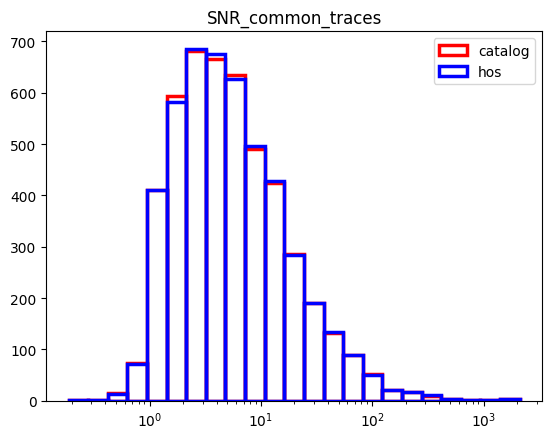

In [105]:
ai = log_hist([common_cat_snr,common_hos_snr], title="SNR_common_traces",Normalize=False, ylogscale=False, xlogscale=True, ratio=1.5,edgecolors= ["red","blue"],facecolor="none",linewidth=2.5, labels=["catalog","hos"])

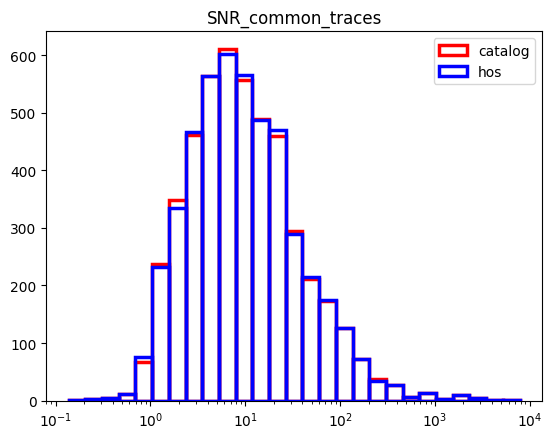

In [5]:
ai = log_hist([common_cat_snr,common_hos_snr], title="SNR_common_traces",Normalize=False, ylogscale=False, xlogscale=True, ratio=1.5,edgecolors= ["red","blue"],facecolor="none",linewidth=2.5, labels=["catalog","hos"])

(3833,)
(3842,)


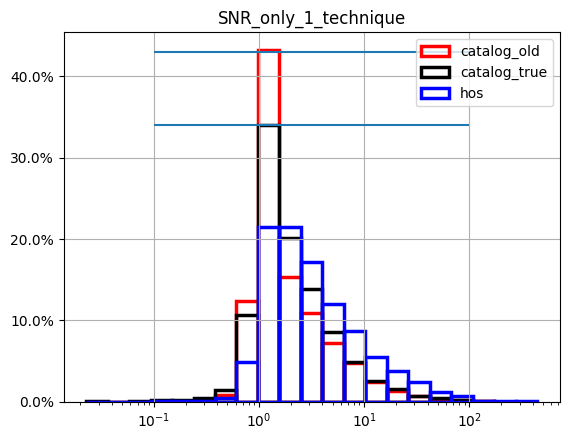

In [202]:
cat_only_snr = _Library_HOS.SNR2(D.sismogramma[util_only_cat.index],util_only_cat[k].values)
cat_only_snr_ok = _Library_HOS.SNR2(D.sismogramma[util_only_cat.index],util_only_cat["trace_P_arrival_sample"].values, equalsize=False)
ai2 = log_hist([cat_only_snr,cat_only_snr_ok,hos_only_snr], title="SNR_only_1_technique",Normalize=True, ylogscale=False,xlogscale=True,ratio=1.6,edgecolors= ["red","black","blue"],facecolor="none",linewidth=2.5, labels=["catalog_old","catalog_true","hos"])
plt.grid()
plt.hlines([0.43,0.34],0.1,100)


(3833,)
(3842,)


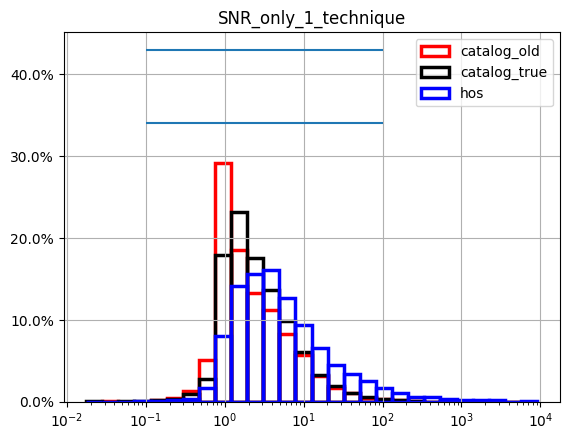

In [5]:
cat_only_snr = _Library_HOS.SNR2(D.sismogramma[util_only_cat.index],util_only_cat[k].values)
cat_only_snr_ok = _Library_HOS.SNR2(D.sismogramma[util_only_cat.index],util_only_cat["trace_P_arrival_sample"].values, equalsize=False)
ai2 = log_hist([cat_only_snr,cat_only_snr_ok,hos_only_snr], title="SNR_only_1_technique",Normalize=True, ylogscale=False,xlogscale=True,ratio=1.6,edgecolors= ["red","black","blue"],facecolor="none",linewidth=2.5, labels=["catalog_old","catalog_true","hos"])
plt.grid()
plt.hlines([0.43,0.34],0.1,100)

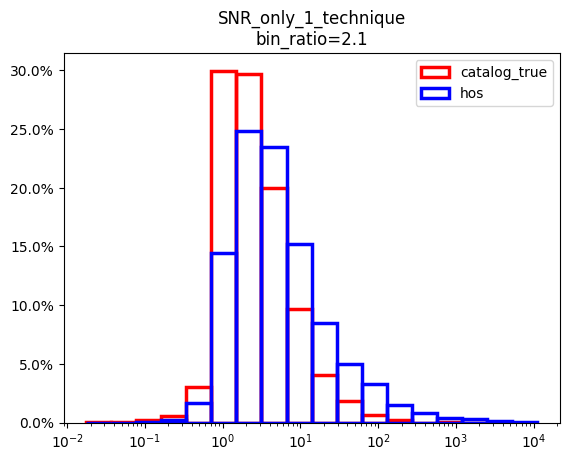

In [18]:
ratio = 2.1
ai2 = log_hist([cat_only_snr_ok,hos_only_snr], title=f"SNR_only_1_technique\nbin_ratio={ratio}",Normalize=True, ylogscale=False,xlogscale=True,ratio=ratio,edgecolors= ["red","blue"],facecolor="none",linewidth=2.5, labels=["catalog_true","hos"])


In [72]:
cat_snr_bass = []
hos_snr_bass = []
div = []
for al in np.linspace(1,1.5,100):
    cat_snr_bass.append(len(cat_only_snr_ok[(cat_only_snr_ok<=al)])/ len(cat_only_snr_ok))
    hos_snr_bass.append(len(hos_only_snr[(hos_only_snr<=al)])/ len(hos_only_snr))
    div.append(cat_snr_bass[-1]/hos_snr_bass[-1])

In [9]:
al = 1.4
len(cat_only_snr_ok[(cat_only_snr_ok<=al)])/ len(cat_only_snr_ok), len(hos_only_snr[(hos_only_snr<=al)])/ len(hos_only_snr)

(0.30114523685580424, 0.14483589280337247)

In [112]:
al = 3.5
len(cat_only_snr_ok[(cat_only_snr_ok>=al)])/ len(cat_only_snr_ok), len(hos_only_snr[(hos_only_snr>=al)])/ len(hos_only_snr)

(0.3266527850078084, 0.5435109906654622)

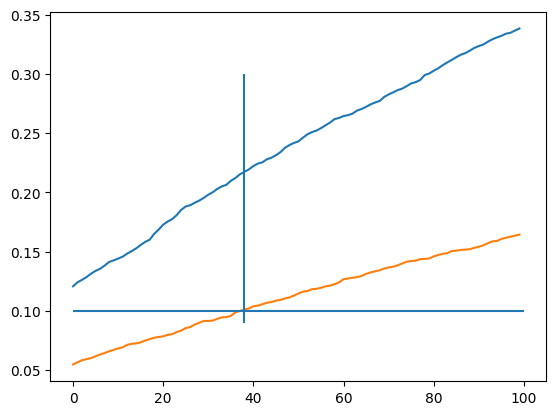

In [62]:
plt.plot(cat_snr_bass)
plt.plot(hos_snr_bass)
plt.hlines(0.10,0,100)
plt.vlines(38,0.09,0.3)

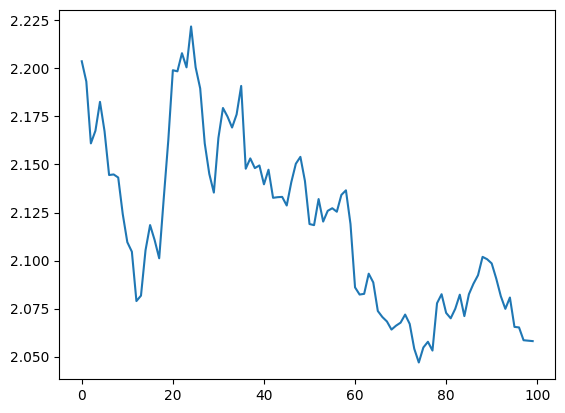

In [73]:
plt.plot(div)

0.2

In [53]:
x = (1.35/(1.75025853e-02-1.75025853e-02*0.1))**(1/8)
x

1.7443098451421457

In [22]:
def calcola_cdf(osservazioni):
    sorted_osservazioni = np.sort(osservazioni)
    n = len(sorted_osservazioni)
    cdf = np.arange(1, n + 1) / n
    return sorted_osservazioni, cdf
a, b = calcola_cdf(cat_only_snr_ok)
c,d = calcola_cdf(hos_only_snr)

In [163]:
len(cat_only_snr_ok[(cat_only_snr_ok<=ai2[0][1][9])])/ len(cat_only_snr_ok)

0.47058823529411764

In [164]:
len(cat_only_snr[(cat_only_snr<=ai2[0][1][9])])/ len(cat_only_snr)

0.5677015392642839

In [165]:
len(hos_only_snr[(hos_only_snr<=ai2[0][1][9])])/ len(hos_only_snr)

0.27009936766034326

In [175]:
cat_only_snr_ok = _Library_HOS.SNR2(D.sismogramma[util_only_cat.index],util_only_cat["trace_P_arrival_sample"].values,equalsize=True)

(3888,)


In [176]:
len(cat_only_snr_ok[(cat_only_snr_ok>=0.6) & (cat_only_snr_ok<=1.3)])

1253

In [179]:
ai2[0][1][7], ai2[0][1][9]

(0.6100072415214646, 1.5616185382949495)

In [182]:
from obspy import read
read("/home/silvia/Desktop/Data/DETECT/Tr_1_picked_Z/210901012118.S0213.CHZ.sac")

1 Trace(s) in Stream:
ZK.S0213..CHZ | 2021-09-01T01:20:48.000000Z - 2021-09-01T01:21:48.000000Z | 200.0 Hz, 12001 samples

In [39]:
import os
import shutil

cat_only_snr_ok2 = _Library_HOS.SNR2(D.sismogramma[util_only_cat.index],util_only_cat["trace_P_arrival_sample"].values, equalsize=True)
T1 = os.listdir("/home/silvia/Desktop/Data/DETECT/Tr_1_picked_Z/")
T2 = os.listdir("/home/silvia/Desktop/Data/DETECT/Tr_2_picked_Z/")
dst = "/home/silvia/Desktop/Traces_bins_SNR_lower_1.5_only_cat/"
for name in util_only_cat[(cat_only_snr_ok2>0) & (cat_only_snr_ok2<=1.3)]["trace_name"]:
    if name+".sac" in T1:
        shutil.copyfile(f"/home/silvia/Desktop/Data/DETECT/Tr_1_picked_Z/{name}.sac", dst+name+".sac")
    if name+".sac" in T2:
        shutil.copyfile(f"/home/silvia/Desktop/Data/DETECT/Tr_2_picked_Z/{name}.sac", dst+name+".sac")


(3888,)


In [32]:
ai2[0][1][6]

1.5011288463251071

In [40]:
util_only_cat[(cat_only_snr_ok2>=0) & (cat_only_snr_ok2<=1.3)]

,trace_name,trace_P_arrival_sample,"stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1","stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.2","stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.3","stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.4","stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_max",Accept,Accept_catalog_concordance_array,event,station
1202,210904062053.S0112.CHZ,6991,7044,7044,7045,7045,7047,FALSE,TRUE,210904062053,S0112
1242,210904062053.S0512.DHZ,6969,6000,6001,6005,6010,6011,FALSE,TRUE,210904062053,S0512
1292,210904062053.S1014.DHZ,7195,6762,6794,6795,6805,6805,FALSE,TRUE,210904062053,S1014
3557,210907022011.S0110.CHZ,6700,6255,6373,6440,-94300,6442,FALSE,POCHI,210907022011,S0110
3570,210907022011.S0212.CHZ,7322,6000,6000,6000,6345,6346,FALSE,POCHI,210907022011,S0212
...,...,...,...,...,...,...,...,...,...,...,...
295428,220226013329.S0817.DHZ,7723,6000,6002,6003,6004,6008,FALSE,POCHI,220226013329,S0817
295433,220226013329.S0902.DHZ,7250,7569,7592,7593,7593,7594,POCHI,POCHI,220226013329,S0902
295447,220226013329.S1002.DHZ,7227,7525,7552,7586,7586,7592,FALSE,POCHI,220226013329,S1002
300560,220228163700.S0108.CHZ,7486,6842,6988,7057,7057,7058,FALSE,POCHI,220228163700,S0108


In [41]:
util_only_hos[(hos_only_snr>0) & (hos_only_snr<=1.3)]


,trace_name,trace_P_arrival_sample,"stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1","stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.2","stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.3","stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.4","stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_max",Accept,Accept_catalog_concordance_array,event,station
132,210901034256.S0110.CHZ,-1,6894,6895,6895,6895,6897,TRUE,FALSE,210901034256,S0110
146,210901034256.S0310.DHZ,-1,6819,6820,6820,6820,6821,TRUE,FALSE,210901034256,S0310
1205,210904062053.S0116.CHZ,-1,7502,7503,7523,7524,7526,TRUE,FALSE,210904062053,S0116
1255,210904062053.S0616.DHZ,-1,7368,7386,7386,7386,7387,TRUE,FALSE,210904062053,S0616
3588,210907022011.S0318.DHZ,-1,6084,6084,6085,6085,6086,TRUE,FALSE,210907022011,S0318
...,...,...,...,...,...,...,...,...,...,...,...
295314,220226004354.S1108.CHZ,-1,6878,6878,6878,6878,6880,TRUE,FALSE,220226004354,S1108
295326,220226013329.S0115.CHZ,-1,7379,7380,7380,7380,7381,TRUE,FALSE,220226013329,S0115
300474,220228082620.S0515.DHZ,-1,6767,6767,6767,6767,6768,TRUE,FALSE,220228082620,S0515
300538,220228082620.S0919.DHZ,-1,6837,6849,6850,6850,6851,TRUE,FALSE,220228082620,S0919


In [37]:
import os
import shutil
from obspy import read
T1 = os.listdir("/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/Tracce_First_part_new")
T2 = os.listdir("/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/Tracce_Second_part_new")
dst = "/home/silvia/Desktop/Traces_bins_SNR_low_only_cat/"
for ind in util_only_hos[(hos_only_snr>=0) & (hos_only_snr<=ai2[0][1][6])].index:
    ev = util_only_hos["event"][ind]
    name = util_only_hos["trace_name"][ind][-9:]+".sac"
    if ev in T1:
        b = read(f"/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/Tracce_First_part_new/{ev}/{name}")
        b[0].stats.sac["a"] = util_only_hos[k][ind]/200.
    if ev in T2:
        b = read(f"/home/silvia/Desktop/Data/DETECT/transfer_15588_files_ada1a770/Tracce_Second_part_new/{ev}/{name}")
        b[0].stats.sac["a"] = util_only_hos[k][ind]/200.
    b.write(f"/home/silvia/Desktop/Traces_bins_SNR_lower_1.5_only_hos/{ev}.{name}")



        


In [285]:
a = read("/home/silvia/Desktop/Data/DETECT/Tr_1_picked_Z/210901012118.S0112.CHZ.sac")

In [298]:
b[0].stats.sac["a"]


34.25

In [305]:
k

'stat: S_4 type_filter: bandpass filter freq: [1, 30] window_width: 300 tresh:_ons_th=0.1'

In [289]:
a[0].stats.sac["a"]

32.75

# Filter SNR

In [251]:
data_filtered = []
freq = 1
filt = "highpass"
for i in util_only_cat.index:
    data_filtered.append(_Library_HOS.freq_filter(D.sismogramma[i], D.metadata["sampling_rate"][i], freq, type_filter= filt))

data_filtered2 = np.array(data_filtered)
cat_only_snr_ok_filtered_highpass_1 = _Library_HOS.SNR2(data_filtered2,util_only_cat["trace_P_arrival_sample"].values)


(3842,)


In [252]:
data_filtered = []
freq = 30
filt = "lowpass"
for i in util_only_cat.index:
    data_filtered.append(_Library_HOS.freq_filter(D.sismogramma[i], D.metadata["sampling_rate"][i], freq, type_filter= filt))

data_filtered2 = np.array(data_filtered)
cat_only_snr_ok_filtered_lowpass_30 = _Library_HOS.SNR2(data_filtered2,util_only_cat["trace_P_arrival_sample"].values)

(3842,)


(3842,)


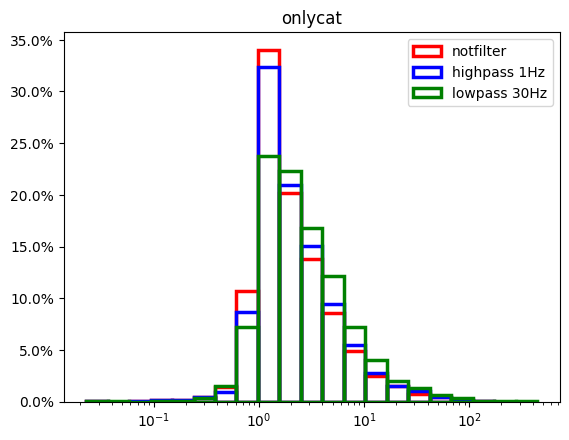

In [253]:
ai = log_hist([cat_only_snr_ok,cat_only_snr_ok_filtered_highpass_1,cat_only_snr_ok_filtered_lowpass_30], title="onlycat",Normalize=True, ylogscale=False, xlogscale=True, ratio=1.6,edgecolors= ["red","blue","green"],facecolor="none",linewidth=2.5, labels=["notfilter","highpass 1Hz","lowpass 30Hz"])

In [100]:
#210929234853.S0[2,4,5,6,8,9]09.DHZ
y= "210929234853.S0209.DHZ"
yy="210929234853.S0409.DHZ"
yyy="210929234853.S0509.DHZ"
yyyy="210929234853.S0609.DHZ"
yyyyy="210929234853.S0809.DHZ"
yyyyyy="210929234853.S0909.DHZ"
D.metadata[D.metadata["trace_name"]==yyy]

,trace_name,source_id,source_latitude_deg,source_longitude_deg,source_depth,source_origin_time,station_code,station_channels,trace_start_time,trace_P_arrival_sample,source_magnitude,source_magnitude_type,sampling_rate,centrato,demeaned,normalized,trace_snr
52071,210929234853.S0509.DHZ,210929234853,40.7318,15.356,1.7,2021-09-29 23:48:53,S0509,DHZ,2021-09-29T23:48:23.000000Z,-1,0.35,ML,200.0,True,False,False,0


In [96]:
util_only_hos[k][52052]

6386

In [101]:
_Library_HOS.SNR2(np.array([D.sismogramma[52071]]),[util_only_hos[k][52071]])

(1,)


array([366.71256757])

In [84]:
D.metadata["trace_name"]

0         210901012118.S0110.CHZ
1         210901012118.S0112.CHZ
2         210901012118.S0113.CHZ
3         210901012118.S0114.CHZ
4         210901012118.S0116.CHZ
                   ...          
300839    220228163810.S1017.DHZ
300840    220228163810.S1018.DHZ
300841    220228163810.S1019.DHZ
300842    220228163810.S1020.DHZ
300843    220228163810.S1108.CHZ
Name: trace_name, Length: 300844, dtype: object